In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#Load Iris Dataset
df = pd.read_csv("D:\MIT\DL\iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Exploration

In [7]:
#Proportion of classes in data
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

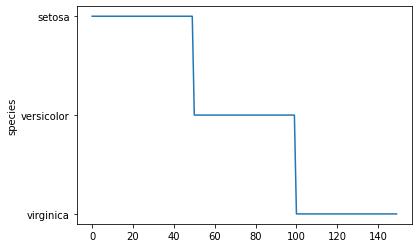

In [9]:
#Visual representaion of the distribution of class labels in the data
sns.lineplot(df['species'])
plt.show()

In [15]:
#Encode the target variable into numeric labels [Iris-setosa - 0, Iris-versicolor - 1,	Iris-virginica - 2]
df['species'] = LabelEncoder().fit_transform(df['species'])
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train test split and analysis

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df.species, test_size=0.1, random_state=42)

In [19]:
#Checking if the data records have been randomised in the train-test splits
print(y_train[:10])
print(y_test[:10])

56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
Name: species, dtype: int32
73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
Name: species, dtype: int32


<Figure size 864x288 with 0 Axes>

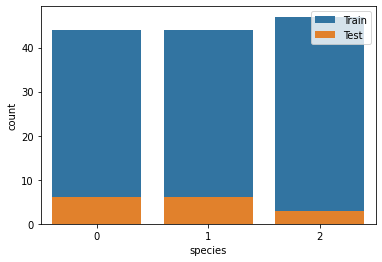

In [20]:
plt.figure(figsize = (12, 4))
f, axes = plt.subplots(1, 1)
sns.countplot(x = y_train)
sns.countplot(x = y_test)
plt.legend(['Train', 'Test'])
plt.show()

### Model Building

In [21]:
#Building two NN models with 2 and 3 hidden layers respectively

# Model 1: 2 hidden layers
model1 = Sequential()
model1.add(Input(shape=(4,), name='il'))
model1.add(Dense(8, activation='relu', name='hl1'))
model1.add(Dense(4, activation='relu', name='hl2'))
model1.add(Dense(3, activation='softmax', name='ol'))

# Model 2: 3 hidden layers
model2 = Sequential()
model2.add(Input(shape=(4,), name='il'))
model2.add(Dense(8, activation='relu', name='hl1'))
model2.add(Dense(6, activation='relu', name='hl2'))
model2.add(Dense(4, activation='relu', name='hl3'))
model2.add(Dense(3, activation='softmax', name='ol'))

In [22]:
#Summary of Model 1
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                          │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hl2 (Dense)                          │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ol (Dense)                           │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Summary of Model 2
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                          │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hl2 (Dense)                          │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hl3 (Dense)                          │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ol (Dense)                           │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

### Model compilation

In [25]:
#Compiling the two models
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [26]:
#Fitting model 1
epochs = 50
batch_size = 32
model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.3316 - loss: 1.6714 - val_accuracy: 0.1429 - val_loss: 1.8753
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3493 - loss: 1.4632 - val_accuracy: 0.1429 - val_loss: 1.6396
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3451 - loss: 1.3150 - val_accuracy: 0.1429 - val_loss: 1.4336
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3628 - loss: 1.1170 - val_accuracy: 0.1429 - val_loss: 1.2632
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3243 - loss: 1.0460 - val_accuracy: 0.1429 - val_loss: 1.1252
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3840 - loss: 0.9216 - val_accuracy: 0.3571 - val_loss: 1.0207
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5078 - loss: 0.8781 - val_accuracy: 0.6429 - val_loss: 0.9433
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6669 - loss: 0.8544 - val_accuracy: 0.7143 - val_loss: 0.8875


In [27]:
#Fitting model 2
epochs = 50
batch_size = 32
model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.0000e+00 - loss: 1.3343 - val_accuracy: 0.0000e+00 - val_loss: 1.3454
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 1.2995 - val_accuracy: 0.0000e+00 - val_loss: 1.3105
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 1.2672 - val_accuracy: 0.0000e+00 - val_loss: 1.2810
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0099 - loss: 1.2347 - val_accuracy: 0.0714 - val_loss: 1.2547
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0862 - loss: 1.2239 - val_accuracy: 0.0714 - val_loss: 1.2327
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1474 - loss: 1.2273 - val_accuracy: 0.0714 - val_loss: 1.2133
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1891 - loss: 1.1963 - val_accuracy: 0.2857 - val_loss: 1.1948
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3194 - loss: 1.1737 - val_accuracy: 0.

### Model Evaluation

In [28]:
#Evaluating Model 1
loss, accuracy = model1.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8000 - loss: 0.6057
Test loss: 0.6057280898094177
Test accuracy: 0.800000011920929


In [29]:
#Evaluating Model 2
loss, accuracy = model2.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6667 - loss: 0.7196
Test loss: 0.7196350693702698
Test accuracy: 0.6666666865348816


In [30]:
#Assigning predictions of the two models to variables
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
y_pred2 = np.argmax(model2.predict(X_test), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [31]:
#Classification Report
print('Classification Report for Model 1: \n', classification_report(y_test, y_pred1))
print('\nClassification Report for Model 2: \n', classification_report(y_test, y_pred2))

Classification Report for Model 1: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         6
           2       0.50      1.00      0.67         3

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.78        15
weighted avg       0.90      0.80      0.80        15


Classification Report for Model 2: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.17      0.29         6
           2       0.38      1.00      0.55         3

    accuracy                           0.67        15
   macro avg       0.79      0.72      0.61        15
weighted avg       0.88      0.67      0.62        15



In [32]:
#Confusion Matrix
print("Confusion Matrix for Model 2:\n", confusion_matrix(y_test, y_pred1))
print("Confusion Matrix for Model 2:\n", confusion_matrix(y_test, y_pred2))

Confusion Matrix for Model 2:
 [[6 0 0]
 [0 3 3]
 [0 0 3]]
Confusion Matrix for Model 2:
 [[6 0 0]
 [0 1 5]
 [0 0 3]]


## Decission

### After trying many times, we found that comparing the two models doesn’t make much sense. The results change a lot because the dataset is small. So, it’s hard to trust the comparison.